In [1]:
from simulate import simulate
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import shutil

In [2]:
SIMTIME = 12
NUMF = 20

df = pd.DataFrame()

pd.concat([df, simulate(SIMTIME, NUMF, 0.3)], ignore_index=True)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,sim_time,forget_threshold,num_facts,model_sof,c,s,F,t0
0,0.286328,0.387109,0.200781,0.3375,0.250391,0.3,0.340234,0.265234,0.329687,0.330469,...,0.352734,0.345703,12.0,-0.8,20.0,0.3,0.25,0.3,1.0,0.3


C:\Users\Frankie\AppData\Local\Temp\ipykernel_7220\2373390425.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(row[0])


0.3003906249999999
0.07656249999999998
0.18789062499999995
0.36406249999999984
0.24999999999999997
0.279296875
0.15156249999999996
0.20039062500000013
0.3203124999999999
0.1589843750000001
0.14453124999999997
0.20117187500000008
0.15859374999999998
0.27812500000000007
0.17578125000000003
0.171875
0.3148437500000001
0.3687499999999999
0.225
0.15117187499999998
0.24882812500000012
0.2300781250000001
0.17578125
0.21601562500000013
0.2968750000000001
0.26289062499999993
0.192578125
0.251953125
0.13984375000000002
0.20039062499999996
0.2500000000000001
0.35468750000000004
0.3707031249999999
0.296875
0.2828125
0.28828124999999993
0.281640625
0.2011718750000001
0.23828124999999997
0.3261718750000001
0.3218749999999999
0.20585937499999993
0.20898437500000008
0.24140625000000013
0.330078125
0.2562500000000001
0.2000000000000001
0.20117187499999997
0.27109375
0.2007812500000001
0.198828125
0.29921875
0.3160156249999999
0.20039062499999996
0.201171875
0.34609375
0.283203125
0.190234375
0.26249999

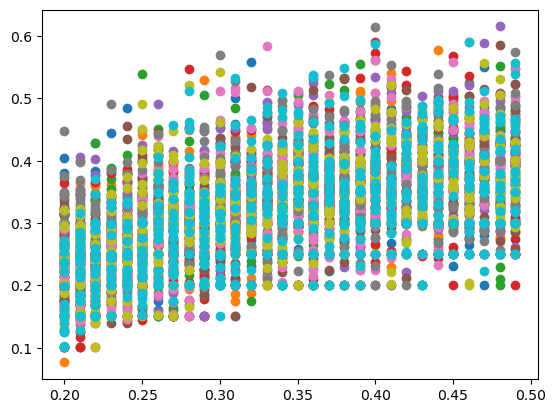

In [54]:
SIMTIME = 12
NUMFACTS = 20
NUMREPS = 10
s = 0.3
c = 0.25

df = pd.DataFrame()
for msof in [x / 100 for x in range(20, 50)]:
    for _ in range(NUMREPS):
        df = pd.concat([df, simulate(SIMTIME, NUMFACTS, msof, c, s,)], ignore_index=True)

df.to_csv("dataanalysis\data\practdata")

for index, row in df.iterrows():
    print(row[0])
    plt.scatter([row["model_sof"] for _ in range(NUMFACTS)], row[0:NUMFACTS])

plt.show()

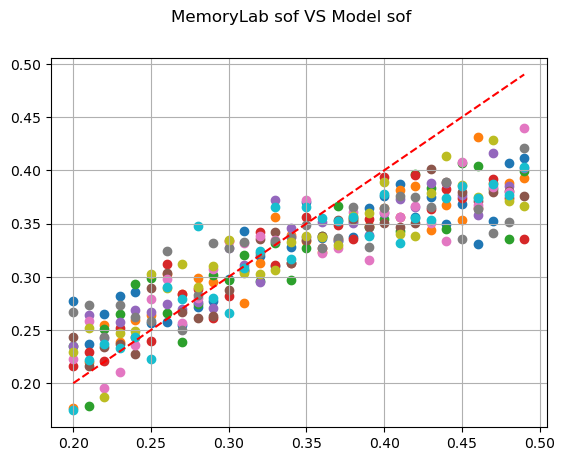

In [55]:
df = pd.read_csv("dataanalysis\data\practdata")
l = []

for index, row in df.iterrows():
    
    facts = row[1:int(row["num_facts"] + 1)]
    facts = [x for x in facts if x != 0.3]
    avg = sum(facts) / len(facts)
    plt.scatter(row["model_sof"], avg)

plt.plot([x / 100 for x in range(20, 50)], [x / 100 for x in range(20, 50)], "--r")
plt.grid(True)
plt.suptitle("MemoryLab sof VS Model sof")
plt.show()
